### 感知机算法基本原理

**感知机**是一个最基础的二分类线性分类算法, 虽然简单, 但是可以让我们了解一个分类算法到底是怎么回事. 如下图所示, 假如我们想通过一个人的身高(X1), 体重(X2)两个特征对一个人是男生还是女生进行判别(二分类), 我们收集了3个男生的身高体重数据(正例, 如红色标记), 4个女生的身高体重数据(负例, 如紫色标记). 有了这些数据之后, 我们的目的是找到一条线(方程)将两者能恰巧分离开来, 如图中的L3,对于红色的点, 带入方程之后得到的值都大于0, 对于紫色的点带入方程后都小于0. 找到这个方程之后, 如果来了一个新的样本, 我们将其带入方程, 看是否大于0即可判断此样本是男生还是女生. 

![jupyter](./images/02/感知机分类模型2.jpg)

但是如何求得这条分隔线的方程? 能使其正好将正例和反例分开? 感知机是个线性模型, 因此上图中的分隔线的方程可以假设为: $y=w_1x_1+w_2x_2+b$, 这只是输入特征维度为两维的情形, 感知机更一般的形式是:
    
假设特征空间的为: $\chi \subseteq R^n$ (这个的含义是输入样本可以是n维空间中任意的一个点), 输出空间为: $y=\{+1, -1\}$ (这个的含义是实例的类别), 由输入空间到输出空间的关系为:
$$
f(x) = sign(w^T x+b)
$$

其中, $w\subset R^n$是模型的参数, 称为权重, 这是个列向量, 在本例中为$[w_1,w_2]'$, $b\subset R$是模型的偏置, 是个标量. $x$是输入样本向量. **注意**: 这里面的向量默认都是列向量, 带了'的表示向量的转置(即将列向量转换称为行向量或者反之), $w^T x$是用了线性代数里面的矩阵乘法, 行向量与列向量相乘的结果是个标量. sign是个符号函数:
$$ sign(x)=\left\{
\begin{aligned}
+1, x \geq 0 \\
-1, x \lt 0
\end{aligned}
\right.
$$

感知机模型的假设空间是定义在特征空间的所有线性分类模型, 即函数集合: $\{f|f(x)=w^T x+b\}$, 上面的L1~L6都在这个函数集合中. 给定了训练数据, 如何将模型参数$w, b$算出来?

### 感知机算法学习策略

上图中, L5比L4要差, 因为L5把一个紫色样本点分错了, 在求解模型的时候, 需要定义一个函数来衡量模型分类的好坏, 这个函数称为损失函数或者代价函数. 损失函数的一个选择是统计误分类点的数量, 比如L5为1, L4为0, 则L4更好. 但是这样的损失函数不是参数$\vec{w}, b$的可导函数, 不方便求解. 因此损失函数的另一种选择是误分类点到分隔线的距离:
$$
\frac{1}{||w||}|w^T x+b|
$$

对于误分类点($x_i, y_i$)而言, 必有:
$$
-y_i(w^T x+b)>0
$$

因此距离可以写成:
$$
-\frac{1}{||w||}y_i(w^T x+b)
$$

假设共有**M**个误分类点, 则这些点的总距离可以表示成:
$$
-\frac{1}{||w||}\sum_{x_i\subset M}y_i(w^T x_i+b)
$$

忽略$\frac{1}{||w||}$ (思考下为什么可以忽略), 则感知机的代价函数为:
$$
L(w,b)=-\sum_{x_i\subset M}y_i(w^T x_i+b)
$$

显然, 这个代价函数是非负的, 如果全部的样本都正确分类, 则其为0.

### 感知器学习算法原始形式

给定训练数据集:
$$
T = \{(x_1, y_1), (x_2, y_2), ..., (x_N, y_N)\}
$$
目标是求得参数$w, b$, 从而使$L(w,b)$的值达到最小, 即:
$$
\min_{w,b}L(w,b) = -\sum_{x_i\subset M}y_i(w^T x_i+b)
$$

求解的过程采用梯度下降算法:
$$
\bigtriangledown_wL(w,b)= - \sum_{x_i\subset M}y_ix_i
$$
$$
\bigtriangledown_{b}L(w,b)= - \sum_{x_i\subset M}y_i
$$
使用随机梯度下降算法, 每次随机选择一个误分类点来对$w,b$进行梯度下降:
$$
w \gets w - \alpha(-y_i x_i)
$$
$$
b \gets b - \alpha(-y_i)
$$
这里的$\alpha$为学习率, 在(0,1)之间取值.

In [180]:
import numpy as np
import os
os.chdir('../')
import matplotlib.pyplot as plt
%matplotlib inline

In [181]:
# 训练集
X = np.asarray([[1,4],[2,3],[3,1],[4,2],[3,7],[4,6],[5,4]]).T  #训练样本
y = np.asarray([-1,-1,-1,-1,1,1,1])  # 训练样本的标签
print(X)

[[1 2 3 4 3 4 5]
 [4 3 1 2 7 6 4]]


In [182]:
def plot_decision_boundary(x, y, w, bias):
    """
    绘制前两个维度的决策边界
    """
    w1, w2 = w[0], w[1]
    x1 = np.arange(np.min(x[0,:]), np.max(x[1,:]), 0.1)
    x2 = -w1 / w2 * x1 - bias / w2
    plt.scatter(x[0,:], x[1,:], c=y, s=50)
    plt.plot(x1, x2, 'r')
    plt.show()
    
def loss(X, y, w, b):
    """
    计算loss
    """
    dist_vec = y * (np.dot(w, X) + b)
    misclassify_flag = dist_vec <= 0
    if sum(misclassify_flag) == 0:
        return 0
    return - sum(dist_vec[misclassify_flag])

In [183]:
# 迭代求解, 每次只取一个误分类样本
# 参数初始化
alpha = 0.1  # 学习率
w = np.asarray([0.1,0.1])  # 初始的参数w
b = 1  # 初始的b
n = len(y)  # 训练样本的数量
i = 0
while True:
    if y[i] * (np.dot(w, X[:, i]) + b) <= 0:
        print("Iter sample {}, loss={}".format(i, loss(X, y, w, b)))
        w = w + alpha * y[i] * X[:,i]
        b = b + alpha * y[i]
        i = 0  # 重置i
    else:
        i += 1

    if i == n:
        print("Get final w = {}".format(w))
        print("Get final b = {}".format(b))
        break

Iter sample 0, loss=6.0
Iter sample 2, loss=3.300000000000001
Iter sample 4, loss=8.000000000000002
Iter sample 0, loss=6.6000000000000005
Iter sample 0, loss=1.7
Iter sample 4, loss=8.799999999999999
Iter sample 0, loss=6.200000000000002
Iter sample 1, loss=2.1999999999999997
Iter sample 4, loss=9.1
Iter sample 0, loss=5.800000000000001
Iter sample 1, loss=2.1999999999999993
Iter sample 4, loss=9.399999999999999
Iter sample 0, loss=5.400000000000002
Iter sample 2, loss=2.299999999999999
Iter sample 4, loss=7.499999999999997
Iter sample 0, loss=6.000000000000003
Iter sample 0, loss=0.7000000000000015
Iter sample 4, loss=8.299999999999997
Iter sample 0, loss=5.600000000000004
Iter sample 1, loss=1.099999999999998
Iter sample 4, loss=8.599999999999996
Iter sample 0, loss=5.200000000000004
Iter sample 2, loss=1.199999999999997
Iter sample 4, loss=6.699999999999996
Iter sample 0, loss=5.800000000000004
Iter sample 0, loss=0.6000000000000021
Iter sample 4, loss=7.499999999999996
Iter sample

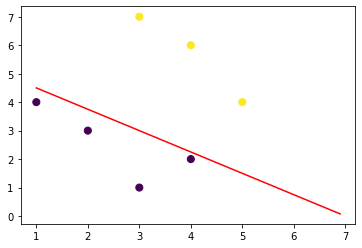

In [184]:
plot_decision_boundary(X, y, w, b)

上面每次只取一个样本去更新梯度, 这种称为随机梯度下降, 当然, 更普遍的做法是每次使用所有的误分类样本来做梯度下降!

In [185]:
# 迭代求解2: 每次使用所有的误分类样本
alpha = 0.5  # 学习率
w2 = [0.3, 0.4]
b2 = -2
dist_vec = y * (np.dot(w2, X) + b2)
misclassify_flag = dist_vec <= 0
index = 0
print("Iter {}: misclassify num: {}, loss: {}".format(index, np.sum(misclassify_flag), loss(X,y,w2,b2)))
while np.sum(misclassify_flag) > 0:
    index += 1
    w2 = w2 + alpha * np.sum(y[misclassify_flag] * X[:, misclassify_flag], axis=1)
    b2  =  b2 + alpha * np.sum(y[misclassify_flag])
    dist_vec = y * (np.dot(w2, X) + b2)
    misclassify_flag = dist_vec <= 0
    print("Iter {}: misclassify num: {}, loss: {}".format(index, np.sum(misclassify_flag), loss(X,y,w2,b2)))
    
print("Get final w = {}".format(w2))
print("Get final b = {}".format(b2))

Iter 0: misclassify num: 1, loss: -0.0
Iter 1: misclassify num: 3, loss: 38.1
Iter 2: misclassify num: 4, loss: 118.0
Iter 3: misclassify num: 3, loss: 12.200000000000003
Iter 4: misclassify num: 3, loss: 91.1
Iter 5: misclassify num: 4, loss: 75.0
Iter 6: misclassify num: 3, loss: 21.099999999999994
Iter 7: misclassify num: 4, loss: 118.0
Iter 8: misclassify num: 2, loss: 20.200000000000003
Iter 9: misclassify num: 3, loss: 31.599999999999994
Iter 10: misclassify num: 4, loss: 107.0
Iter 11: misclassify num: 2, loss: 15.700000000000005
Iter 12: misclassify num: 3, loss: 42.099999999999994
Iter 13: misclassify num: 4, loss: 96.0
Iter 14: misclassify num: 3, loss: 14.100000000000003
Iter 15: misclassify num: 2, loss: 8.8
Iter 16: misclassify num: 2, loss: 8.700000000000003
Iter 17: misclassify num: 3, loss: 43.599999999999994
Iter 18: misclassify num: 4, loss: 98.0
Iter 19: misclassify num: 1, loss: 4.400000000000002
Iter 20: misclassify num: 3, loss: 15.099999999999994
Iter 21: misclas

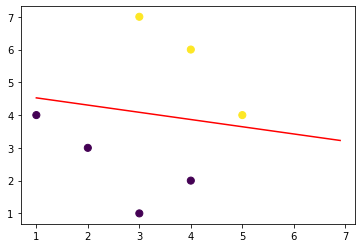

In [186]:
plot_decision_boundary(X, y, w2, b2)

**思考1**: 每次使用所有误分类样本来更新梯度, loss为何忽大忽小? 因为一般而言模型的loss都是使用所有样本计算出来的(不管是正确分类还是错误分类), 而感知机比较特殊, 它只使用误分类样本来计算误差, 利用误分类样本更新完梯度后, 又可能造成了原本正确分类的样本分错了, 因此这个loss不稳定.

### 感知器学习算法对偶形式

上面讲到: 每次随机选择一个误分类点来对$\boldsymbol{w},b$进行梯度下降:
$$
\boldsymbol{w} \gets \boldsymbol{w} + \eta y_i\boldsymbol{x_i}
$$
$$
b \gets b + \eta y_i
$$

初始的$\boldsymbol{w}, b$可以都赋值为0, 则最终得到的$\boldsymbol{w}, b$可以表示为实例X和标签y的线性函数:
$$
\boldsymbol{w} = \sum_{i=1}^N \eta_i y_i \boldsymbol{x_i}
$$

$$
b = \sum_{i=1}^N \eta_i y_i
$$

这里$\eta_i \ge 0, i=1,...,N$. 则感知机模型为:
$$
f(x) = sign(\sum_{j=1}^N \eta_j y_j x^T_j x + \eta_j y_j)
$$

代价函数为:

$$
L(w,b) = L(\eta)= - \sum_{x_i \subset M} y_i (\sum_{j=1}^N \eta_j y_j x^T_j x_i + \eta_j y_j) \
= -\sum_{x_i \subset M} y_i (\sum_{j=1}^N y_j \eta_j (x^T_j x_i + 1))
$$

对$\eta_t$求偏导:
$$
$$

$$
\bigtriangledown_{\eta_t}L(\eta) = - \sum_{x_i \subset M} y_i y_t (x^T_t x_i + 1)
$$

则梯度更新公式为 (当样本t被错分的时候才更新$\eta_t$): 
$$
\eta_t = \eta_t + \alpha \sum_{x_i \subset M} y_i y_t (x^T_t x_i + 1)
$$

如果每次只用一个错分点进行更新:
$$
\eta_t = \eta_t + \alpha  y_t y_t (x^T_t x_t + 1) = \eta_t + \alpha (G(t,t) + 1)
$$

In [187]:
def loss_v2(X, y, eta):
    """
    计算loss
    """
    dist_vec = np.dot(eta * y, 1 + G) * y 
    misclassify_flag = dist_vec <= 0
    if sum(misclassify_flag) == 0:
        return 0
    return -sum(dist_vec[misclassify_flag])

In [235]:
# 训练集
X = np.asarray([[1,4],[2,3],[3,1],[4,2],[3,7],[4,6],[5,4]]).T  #训练样本
y = np.asarray([-1,-1,-1,-1,1,1,1])  # 训练样本的标签
alpha = 0.1  # 学习率
eta = np.array([0.0] * n)  # 待求参数
G = np.dot(X.T, X)  # Gram矩阵
dist_vec = np.dot(eta * y, 1 + G) * y 
misclassify_flag = dist_vec <= 0
index = 0
print("Iter {}: misclassify num: {}, dist_vec:{}, loss: {}".format(index, np.sum(misclassify_flag), dist_vec, loss_v2(X,y,eta)))
while sum(misclassify_flag) > 0:
    index += 1
    for i in range(n):
        if misclassify_flag[i]:
            eta[i] += alpha * np.dot(y[misclassify_flag]* y[i], G[i, misclassify_flag] + 1)
    dist_vec = np.dot(eta * y, 1 + G) * y 
    misclassify_flag = dist_vec <= 0
    print("Iter {}: misclassify num: {}, dist_vec: {}, loss: {}".format(index, np.sum(misclassify_flag), dist_vec, loss_v2(X,y,eta)))
    
w3 = np.dot(X, eta * y)
b3 = np.sum(eta * y) 
print("Get final eta = {}".format(eta))
print("Get final w = {}".format(w3))
print("Get final b = {}".format(b3))

Iter 0: misclassify num: 7, dist_vec:[-0. -0. -0. -0.  0.  0.  0.], loss: -0.0
Iter 1: misclassify num: 4, dist_vec: [-521.4 -489.2 -350.8 -531.   988.   955.8  817.4], loss: 1892.4
Iter 2: misclassify num: 4, dist_vec: [-224.8 -192.6 -109.2 -179.4  416.4  384.2  300.8], loss: 706.0000000000002
Iter 3: misclassify num: 3, dist_vec: [  71.8  104.   132.4  172.2 -155.2 -187.4 -215.8], loss: 558.4000000000001
Iter 4: misclassify num: 4, dist_vec: [-1165.7 -1052.8  -688.9 -1078.   2194.9  2082.   1718.1], loss: 3985.4000000000005
Iter 5: misclassify num: 4, dist_vec: [-869.1 -756.2 -447.3 -726.4 1623.3 1510.4 1201.5], loss: 2799.0000000000005
Iter 6: misclassify num: 4, dist_vec: [-572.5 -459.6 -205.7 -374.8 1051.7  938.8  684.9], loss: 1612.6000000000004
Iter 7: misclassify num: 3, dist_vec: [-275.9 -163.    35.9  -23.2  480.1  367.2  168.3], loss: 462.1000000000009
Iter 8: misclassify num: 3, dist_vec: [ -63.4   41.1  190.2  205.5   77.4  -27.1 -176.2], loss: 266.69999999999914
Iter 9: m

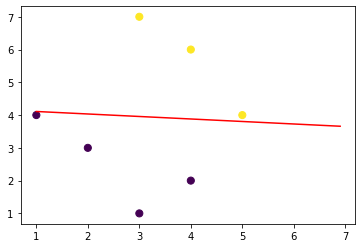

In [236]:
plot_decision_boundary(X, y, w3, b3)